<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics

from sklearn import preprocessing as preproc

%matplotlib inline
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [2]:
#TO DO:
colNames = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", 
                   "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

df = pd.read_csv("pima-indians-diabetes.csv", header=None,names=colNames) 
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [3]:
#TO DO:
print(df.shape)
df.head()

(768, 9)


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [4]:
#TO DO:
df.corr()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4. Render the corr matrix using the heatmap in seaborn.

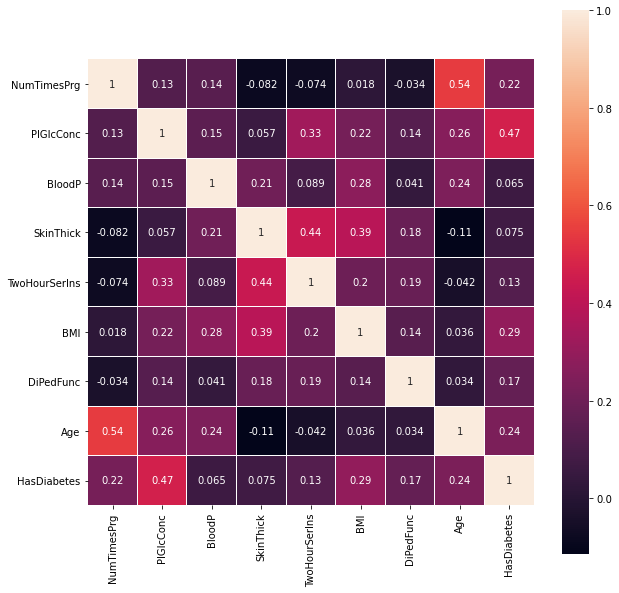

In [5]:
#TO DO:
%matplotlib inline

import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(), linewidths=0.1, square=True, annot=True)

### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [6]:
df.PlGlcConc

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: PlGlcConc, Length: 768, dtype: int64

## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

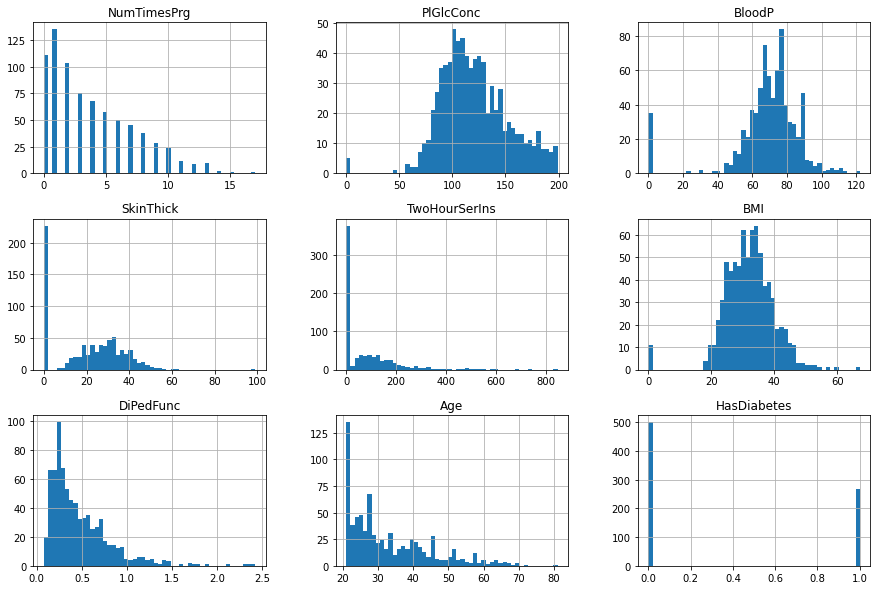

In [7]:
df.hist(bins=50, figsize=(15,10))
plt.show()

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

<AxesSubplot:>

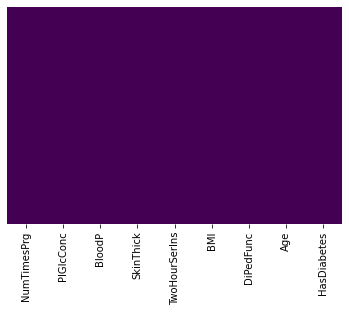

In [8]:
# check nan value
missing_data = df.isnull()
sns.heatmap(missing_data, cbar=False, yticklabels=False, cmap='viridis')

# Using median method to avoid outliers of dataset.

In [9]:
#TO DO:
# the median value for BMI
median_bmi = df['BMI'].median()
# replace median values at value 0
df['BMI'] = df['BMI'].replace(to_replace=0, value=median_bmi)

In [10]:
# the median value for BloodP
median_BloodP = df['BloodP'].median()
# replace median values at value 0
df['BloodP'] = df['BloodP'].replace(to_replace=0, value=median_BloodP)

In [11]:
# the median value for PlGlcConc
median_PlGlcConc = df['PlGlcConc'].median()
# replace median values at value 0
df['PlGlcConc'] = df['PlGlcConc'].replace(to_replace=0, value=median_PlGlcConc)

In [12]:
# the median value for SkinThick
median_SkinThick = df['SkinThick'].median()
# replace median values at value 0
df['SkinThick'] = df['SkinThick'].replace(to_replace=0, value=median_SkinThick)

In [13]:
# the median value for PlGlcConc
median_TwoHourSerIns = df['TwoHourSerIns'].median()
# replace median values at value 0
df['TwoHourSerIns'] = df['TwoHourSerIns'].replace(to_replace=0, value=median_TwoHourSerIns)

## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

[0.10533213 0.23847941 0.09749785 0.08640247 0.07784661 0.14156404
 0.11249433 0.14038316]


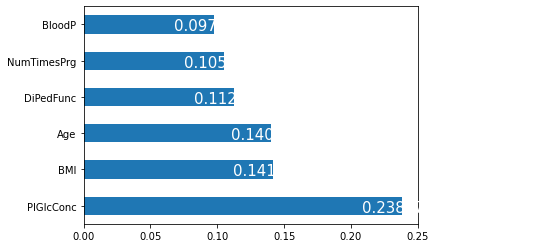

In [14]:
# Find 6 variables which are needed for train/test model

data=df
X = data.iloc[:,0:8]  
y = data.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
ax=feat_importances.nlargest(6).plot(kind='barh')

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-.03, i.get_y()+.08, \
            i.get_width(), fontsize=15,
            color='white')
    
plt.savefig('clasifier.png') 

plt.show()

In [15]:
# normalize data by Standardization
#TO DO:

# data standardization with  sklearn
#from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.preprocessing import MinMaxScaler as Scaler

# copy of datasets
num_cols = ['NumTimesPrg', 'PlGlcConc',
            'BMI', 'DiPedFunc', 'Age']
X = df[num_cols]
y = df.HasDiabetes

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = Scaler().fit(X[[i]])
    
    # transform the training data column
    X[i] = scale.transform(X[[i]])
  
X.head()


<ipython-input-15-81d91cd8ffd8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = scale.transform(X[[i]])
<ipython-input-15-81d91cd8ffd8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = scale.transform(X[[i]])
<ipython-input-15-81d91cd8ffd8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,NumTimesPrg,PlGlcConc,BMI,DiPedFunc,Age
0,0.352941,0.670968,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.509202,0.943638,0.200000


# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [16]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
validation_size = 0.20
seed = 42

X_train, X_test, y_train, y_test =  model_selection.train_test_split(X,  y, stratify=y, 
                                                                     test_size=validation_size, random_state=seed)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 5) (614,)
Test set: (154, 5) (154,)


# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

### TO DO:
Data standardization is about making sure that data is internally consistent; that is, each data type has the same content and format.

### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [18]:
## print("Original True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs)*100))

print('The proportion of positive on the full dataset: {0:2.2f}% ({1})'.format
      (
      (np.count_nonzero(df["HasDiabetes"])/len(df["HasDiabetes"])*100),
      np.count_nonzero(df["HasDiabetes"])
      )
     )

print('The proportion of positive on the training dataset: {0:2.2f}% ({1})'.format
     ((np.count_nonzero(y_train)/len(y_train))*100, np.count_nonzero(y_train)
     )
     )

print('The proportion of positive on the test dataset: {0:2.2f}% ({1})'.format
      ((np.count_nonzero(y_test)/len(y_test))*100, np.count_nonzero(y_test)
     )
     )

The proportion of positive on the full dataset: 34.90% (268)
The proportion of positive on the training dataset: 34.85% (214)
The proportion of positive on the test dataset: 35.06% (54)


In [19]:
print('Shape of X training set {}'.format(X_train.shape), '&', 
      'Size of Y training set {}'.format(y_train.shape))
print('Shape of X test set {}'.format(X_test.shape),'&',
      'Size of Y test set {}'.format(y_test.shape))

Shape of X training set (614, 5) & Size of Y training set (614,)
Shape of X test set (154, 5) & Size of Y test set (154,)


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [20]:
from sklearn.metrics import jaccard_score, f1_score
from sklearn.model_selection import GridSearchCV

In [21]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [22]:
# find best accuracy
knn = KNeighborsClassifier()
parameters = [{'weights': ['uniform','distance'], 'p': [1,2],
                   'algorithm': ['auto','ball_tree','kd_tree','brute'],
                   'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}]
grid_search = GridSearchCV(estimator = knn,param_grid = parameters,scoring ='accuracy',n_jobs = -1,cv = 10)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("The KNN model's parameters with the best accuracy ",best_accuracy)
print("The best parameters of model :",best_parameters)

The KNN model's parameters with the best accuracy  0.7802221047065045
The best parameters of model : {'algorithm': 'auto', 'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.

### TO DO:
- weights = uniform:  uniform weights. All points in each neighborhood are weighted equally.
- n_neighbors = 20: There are 20 closest data which will be searched to the training data.
- p = 1: Power parameter for the Minkowski metric. This is equivalent to using manhattan_distance (l1).
- algorithm = auto: In  this case, the nearest neighbors will attempt to decide the most appropriate algorithm based on the values passed to fit method.

### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [23]:
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=20,p=1,weights='uniform')
knn.fit(X_train, y_train)
yhat = knn.predict(X_test)

print("Train set F1 Score: ", metrics.f1_score(y_train, knn.predict(X_train)))
print("Test set F1 Score: ", metrics.f1_score(y_test, yhat))
print("Train set Jaccard similarity score: ", metrics.jaccard_score(y_train, knn.predict(X_train),pos_label = 0))
print("Test set Jaccard similarity score: ", metrics.jaccard_score(y_test, yhat,pos_label = 0))

Train set F1 Score:  0.6368715083798882
Test set F1 Score:  0.5806451612903226
Train set Jaccard similarity score:  0.74
Test set Jaccard similarity score:  0.6929133858267716


# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [24]:
# find best accuracy
dt = DecisionTreeClassifier()
parameters = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'],
               'max_depth': [1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}]
grid_search = GridSearchCV(estimator = dt,param_grid = parameters,scoring = 'accuracy',n_jobs = -1,cv = 10)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("The Decision Tree model's parameters with the best accuracy ",best_accuracy)
print("The best parameters of model :",best_parameters)

The Decision Tree model's parameters with the best accuracy  0.7473294553146482
The best parameters of model : {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}


In [25]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=4,splitter='best')
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)

print("Train set F1 Score: ", metrics.f1_score(y_train, dt.predict(X_train)))
print("Test set F1 Score: ", metrics.f1_score(y_test, yhat))
print("Train set Jaccard similarity score: ", metrics.jaccard_score(y_train, dt.predict(X_train),pos_label = 0))
print("Test set Jaccard similarity score: ", metrics.jaccard_score(y_test, yhat,pos_label = 0))

print("")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, yhat)))
print(metrics.confusion_matrix(y_test, yhat) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, yhat))
print(metrics.recall_score(y_test, yhat))

Train set F1 Score:  0.7058823529411764
Test set F1 Score:  0.7394957983193278
Train set Jaccard similarity score:  0.6860986547085202
Test set Jaccard similarity score:  0.7181818181818181

Accuracy: 0.7987
[[79 21]
 [10 44]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       100
           1       0.68      0.81      0.74        54

    accuracy                           0.80       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.81      0.80      0.80       154

0.8148148148148148


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


#TO DO:
- criterion = entropy: The function to measure the quality of a split. Supported criteria are “entropy” for the information gain.
- max_depth = 4: The maximum depth of the tree, it reduce overfit for data train
- splitter = best: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split.

# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [26]:
# find best accuracy
from sklearn.svm import SVC
svm = SVC()
parameters = [{'C': [1.0, 10.0, 20.0],
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False],
               'coef0': [0.0, 0.1, 0.5],
               'probability':[True,False]}]
grid_search = GridSearchCV(estimator = svm,param_grid = parameters,scoring = 'accuracy',n_jobs = -1,cv = 10)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("The SVC model's parameters with the best accuracy ",best_accuracy)
print("The best parameters of model :",best_parameters)

The SVC model's parameters with the best accuracy  0.7801956636700159
The best parameters of model : {'C': 20.0, 'coef0': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid', 'probability': True, 'shrinking': True}


In [27]:
svm = SVC(C=10.0,coef0=0.0,gamma='auto',kernel='rbf',shrinking=True, probability=True)
svm.fit(X_train, y_train)
yhat = svm.predict(X_test)

print("Train set F1 Score: ", metrics.f1_score(y_train, svm.predict(X_train)))
print("Test set F1 Score: ", metrics.f1_score(y_test, yhat))
print("Train set Jaccard similarity score: ", metrics.jaccard_score(y_train, svm.predict(X_train),pos_label = 0))
print("Test set Jaccard similarity score: ", metrics.jaccard_score(y_test, yhat,pos_label = 0))

print("")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, yhat)))
print(metrics.confusion_matrix(y_test, yhat) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, yhat))
print(metrics.recall_score(y_test, yhat))

Train set F1 Score:  0.6684350132625995
Test set F1 Score:  0.5346534653465347
Train set Jaccard similarity score:  0.7438524590163934
Test set Jaccard similarity score:  0.6299212598425197

Accuracy: 0.6948
[[80 20]
 [27 27]]

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154

0.5


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


#TO DO:
- C: Regularization parameter. The strength of the regularization is inversely proportional to C.
- corf0:
- gamma = auto: uses 1 / n_features.
- kernel = rbf: If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape.
- shrinking= True: 

# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [28]:
#TO DO:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
parameters = [{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
               'dual': [True, False],
               'C': [1.0, 10.0, 20.0, 30.0, 40.0, 50.0],
               'fit_intercept': [True, False],
               'intercept_scaling': [1.0, 2.0, 3.0,4.0,5.0]
               }]
grid_search = GridSearchCV(estimator = lr,param_grid = parameters,scoring = 'accuracy',n_jobs = -1,cv = 10)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("The LR model's parameters with the best accuracy ",best_accuracy)
print("The best parameters of model :",best_parameters)

The LR model's parameters with the best accuracy  0.783474352194606
The best parameters of model : {'C': 1.0, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'penalty': 'none'}


In [29]:
lr = LogisticRegression(C=1.0,dual=False,fit_intercept=True,intercept_scaling=1.0,penalty='none')
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("Train set F1 Score: ", metrics.f1_score(y_train, lr.predict(X_train)))
print("Test set F1 Score: ", metrics.f1_score(y_test, yhat))
print("Train set Jaccard similarity score: ", metrics.jaccard_score(y_train, lr.predict(X_train),pos_label = 0))
print("Test set Jaccard similarity score: ", metrics.jaccard_score(y_test, yhat,pos_label = 0))

print("")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, yhat)))
print(metrics.confusion_matrix(y_test, yhat) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, yhat))
print(metrics.recall_score(y_test, yhat))

Train set F1 Score:  0.6719160104986877
Test set F1 Score:  0.54
Train set Jaccard similarity score:  0.742798353909465
Test set Jaccard similarity score:  0.6377952755905512

Accuracy: 0.7013
[[81 19]
 [27 27]]

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

0.5


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


#TO DO:
- C: Inverse of regularization strength, smaller values specify stronger regularization.
- dual = False: Dual or primal formulation. Dual formulation is only implemented when n_samples > n_features.
- fit_intercept = True:
- intercept_scaling = 1.0: 
- penalty: Used to specify the norm used in the penalization.

# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from scipy.optimize import minimize

In [31]:
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

vc = VotingClassifier(estimators=[('knn', knn), ('svc', svm), ('dtc', dt), ('lr',lr)], voting='soft')
for clf, label in zip([knn, svm, dt, lr, vc], ['kNN', 'SVC', 'DT', 'LR', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=27, scoring='f1')
    print("F1 Score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
for clf, label in zip([knn, svm, dt, lr, vc], ['kNN', 'SVC', 'DT', 'LR', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=27, scoring='jaccard')
    print("Jaccard score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

F1 Score: 0.61 (+/- 0.12) [kNN]
F1 Score: 0.65 (+/- 0.11) [SVC]
F1 Score: 0.56 (+/- 0.16) [DT]
F1 Score: 0.65 (+/- 0.10) [LR]
F1 Score: 0.65 (+/- 0.12) [Ensemble]
Jaccard score: 0.45 (+/- 0.13) [kNN]
Jaccard score: 0.49 (+/- 0.13) [SVC]
Jaccard score: 0.41 (+/- 0.16) [DT]
Jaccard score: 0.49 (+/- 0.12) [LR]
Jaccard score: 0.49 (+/- 0.14) [Ensemble]


In [32]:
clfs = []

print('KNN LogLoss {score}'.format(score=log_loss(y_test, knn.predict_proba(X_test))))
clfs.append(knn)

print('Support Vector Machine LogLoss {score}'.format(score=log_loss(y_test, svm.predict_proba(X_test))))
clfs.append(svm)

print('Decision Tree LogLoss {score}'.format(score=log_loss(y_test, dt.predict_proba(X_test))))
clfs.append(dt)

print('Logistic Regression LogLoss {score}'.format(score=log_loss(y_test, lr.predict_proba(X_test))))
clfs.append(lr)


KNN LogLoss 0.48626240528470793
Support Vector Machine LogLoss 0.5054305682550427
Decision Tree LogLoss 1.3112897773907939
Logistic Regression LogLoss 0.5186390970433311


### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.¶

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [33]:
vc = VotingClassifier(estimators=[('knn', knn), ('svc', svm), ('dtc', dt), ('lr',lr)], voting='soft')
vc.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("Train set F1 Score: ", metrics.f1_score(y_train, vc.predict(X_train)))
print("Test set F1 Score: ", metrics.f1_score(y_test, yhat))
print("Train set Jaccard similarity score: ", metrics.jaccard_score(y_train, vc.predict(X_train),pos_label = 0))
print("Test set Jaccard similarity score: ", metrics.jaccard_score(y_test, yhat,pos_label = 0))

print("")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, yhat)))
print(metrics.confusion_matrix(y_test, yhat) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, yhat))
print(metrics.recall_score(y_test, yhat))

Train set F1 Score:  0.6702412868632708
Test set F1 Score:  0.54
Train set Jaccard similarity score:  0.7484662576687117
Test set Jaccard similarity score:  0.6377952755905512

Accuracy: 0.7013
[[81 19]
 [27 27]]

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

0.5


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 21. Create a data frame that describes the result as exactly as above.

In [34]:
for j in [knn,svm,dt,lr,vc]:
        j.fit(X_train, y_train)
        yhat = j.predict(X_test)
        print("Train set F1 Score: ", metrics.f1_score(y_train, j.predict(X_train)))
        print("Test set F1 Score: ", metrics.f1_score(y_test, yhat))
        print("Train set Jaccard similarity score: ", metrics.jaccard_score(y_train, j.predict(X_train),pos_label = 0))
        print("Test set Jaccard similarity score: ", metrics.jaccard_score(y_test, yhat,pos_label = 0))        

Train set F1 Score:  0.6368715083798882
Test set F1 Score:  0.5806451612903226
Train set Jaccard similarity score:  0.74
Test set Jaccard similarity score:  0.6929133858267716
Train set F1 Score:  0.6684350132625995
Test set F1 Score:  0.5346534653465347
Train set Jaccard similarity score:  0.7438524590163934
Test set Jaccard similarity score:  0.6299212598425197
Train set F1 Score:  0.7058823529411764
Test set F1 Score:  0.7394957983193278
Train set Jaccard similarity score:  0.6860986547085202
Test set Jaccard similarity score:  0.7181818181818181
Train set F1 Score:  0.6719160104986877
Test set F1 Score:  0.54
Train set Jaccard similarity score:  0.742798353909465
Test set Jaccard similarity score:  0.6377952755905512
Train set F1 Score:  0.6737967914438502
Test set F1 Score:  0.5416666666666666
Train set Jaccard similarity score:  0.75
Test set Jaccard similarity score:  0.65625


In [35]:
#TO DO:
# Define column names
colNames = ('Algorithm','Jaccard-training','F1-score-training','Jaccard-testing','F1-score-testing')

# Define a dataframe with the required column names
masterDF = pd.DataFrame(columns = colNames)

# A list of the group names
names = ['KNN','Decision Tree','SVM','Logistic Regression','Soft Voting']

# Create a dataframe for each group
for i in [names]:
    tempDF = pd.DataFrame(columns = colNames)
    tempDF['Algorithm'] = i
    for j in [knn,svm,dt,lr,vc]:
        j.fit(X_train, y_train)
        yhat = j.predict(X_test)
        tempDF['Jaccard-training'] = [metrics.jaccard_score(y_train,
                                                            j.predict(X_train),pos_label = 0) 
                                                            for j in [knn,svm,dt,lr,vc]]
        
        tempDF['F1-score-training'] = [metrics.f1_score(y_train, j.predict(X_train)) 
                                                        for j in [knn,svm,dt,lr,vc]]
        
        tempDF['Jaccard-testing'] = [metrics.jaccard_score(y_test, j.fit(X_train, y_train).predict(X_test),
                                                           pos_label = 0) for j in [knn,svm,dt,lr,vc]]
        
        tempDF['F1-score-testing'] = [metrics.f1_score(y_test, 
                                                       j.fit(X_train, y_train).predict(X_test))
                                                       for j in [knn,svm,dt,lr,vc]]
    
    # Try to append temporary DF to master DF
    masterDF = masterDF.append(tempDF,ignore_index=True)

masterDF

,Algorithm,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
0,KNN,0.740000,0.636872,0.692913,0.580645
1,Decision Tree,0.743852,0.668435,0.629921,0.534653
2,SVM,0.686099,0.705882,0.718182,0.739496
3,Logistic Regression,0.742798,0.671916,0.637795,0.540000
4,Soft Voting,0.748466,0.670241,0.656250,0.541667


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:
In order to improve accuracy over a single model, the base classifiers in an ensemble must be diverse (meaning they must make different mistakes).